In [8]:
#XGBoost Method
#Import Libraries
import xgboost as xg
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# load data
seed=42
train = pd.read_csv('./data/train_clean_std_reduced.csv')
df_test = pd.read_csv('./data/test_clean_std_reduced.csv')

X = train.drop('SalePrice', axis = 1)
y = train['SalePrice'] 
X_test = df_test


################################################
#GridSearchCV for XgBoost using scikit learn XGBoostRegreesor API:

# A parameter grid for XGBoost
params = {
    'min_child_weight':[4,5], 
    'gamma':[i/10.0 for i in range(3,6)], 
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,11)], 
    'max_depth': [2,3,4]}

# Initialize XGB and GridSearch
xgb = xg.XGBRegressor(nthread=-1)
grid = GridSearchCV(xgb, params)
grid.fit(X, y)

# Print the r2 score
print(r2_score(y, grid.best_estimator_.predict(X)))




0.9516442898916685


In [9]:
# Print the r2 score
print(r2_score(y, grid.best_estimator_.predict(X)))

0.9516442898916685


In [10]:
test = pd.read_csv("./data/test_clean_std_full.csv")
train_pre_stand = pd.read_csv("./data/train.csv")
submission = pd.read_csv("./data/sample_submission.csv")
sale_price_pred = grid.best_estimator_.predict(X_test)
submission['SalePrice'] = sale_price_pred
submission.head()

,Id,SalePrice
0,1461,-0.766545
1,1462,-0.078494
2,1463,0.202180
3,1464,0.339354
4,1465,0.413526


In [11]:
#inverse transform
from sklearn.preprocessing import StandardScaler
#Re-Train Scaler
scaler = StandardScaler()
scaler = scaler.fit(np.log(train_pre_stand[['SalePrice']]))


# inverse transform on transformed price
submission['SalePrice'] = (np.exp(scaler.inverse_transform(submission['SalePrice']))).round(1)
submission.to_csv("./data/xgb2_submission.csv",index = False)

In [12]:
submission['SalePrice'].head()

0    122756.398438
1    161572.203125
2    180734.593750
3    190910.500000
4    196649.593750
Name: SalePrice, dtype: float32

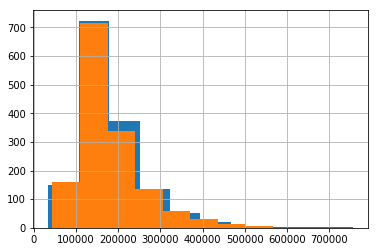

In [13]:
train_pre_stand['SalePrice'].hist()
submission['SalePrice'].hist()